<a href="https://colab.research.google.com/github/Hyunta/Bigdata/blob/main/MNIST_%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EA%B8%B0_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)
from matplotlib import pyplot as plt

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
TensorFlow version :  2.4.1
Keras version :  2.4.3


In [2]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

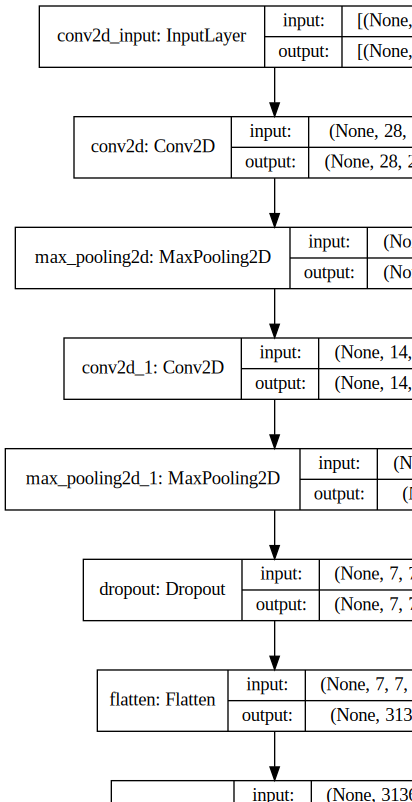

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 89s 188ms/step - loss: 0.4175 - accuracy: 0.8712 - val_loss: 0.0456 - val_accuracy: 0.9852
Epoch 2/12
469/469 [==============================] - 88s 187ms/step - loss: 0.0635 - accuracy: 0.9809 - val_loss: 0.0316 - val_accuracy: 0.9896
Epoch 3/12
469/469 [==============================] - 87s 186ms/step - loss: 0.0457 - accuracy: 0.9851 - val_loss: 0.0318 - val_accuracy: 0.9887
Epoch 4/12
469/469 [==============================] - 88s 187ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0303 - val_accuracy: 0.9899
Epoch 5/12
469/469 [==============================] - 88s 187ms/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0268 - val_accuracy: 0.9910
Epoch 6/12
469/469 [==============================] - 87s 187ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 7/12
469/469 [==============================] - 88s 188ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0262 - val_ac

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.017998840659856796
Test accuracy: 0.9944999814033508


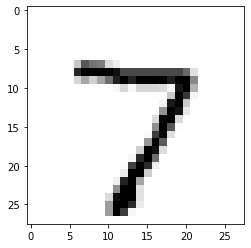

The Answer is  [7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [11]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))

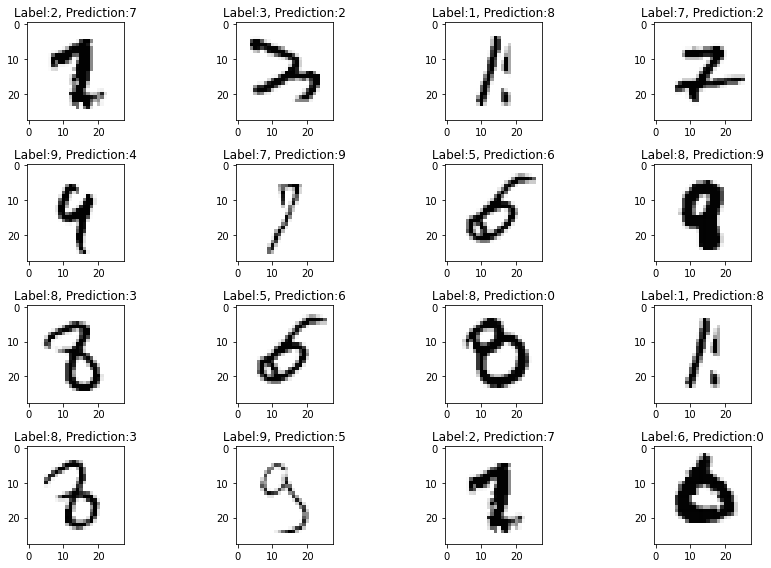

In [13]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
#https://pinkwink.kr/1121